<a href="https://colab.research.google.com/github/M-H-Amini/AAISS2021/blob/main/AAISS2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  In The Name Of ALLAH
#  Amirkabir Artifical Intelligence Student Summit (AAISS)
#  Dive Into Deep Learning 
#  Mohammad Hossein Amini (mhamini@aut.ac.ir)

In [2]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from matplotlib import pyplot as plt

#  Single-Layer Neural Networks

##  Dataset

In [8]:
X = np.linspace(-4, 4, 20)[:, np.newaxis]
y = 1.5 * X + 0.4 + 3 * np.random.rand(len(X), 1)

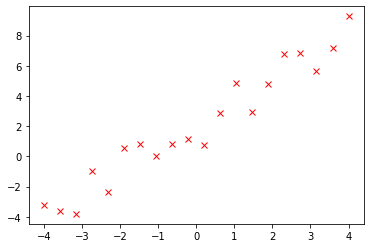

In [9]:
def show(X, y):
  plt.figure()
  plt.plot(X, y, 'rx')
  plt.show()

show(X, y)

##  Model

In [11]:
model = Sequential()
model.add(Dense(1, activation='linear', input_shape=(1,)))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(optimizer='adam', loss='mse')

In [19]:
model.fit(X, y, batch_size=4, epochs=50)

Epoch 1/50
5/5 [==============================] - 0s 3ms/step - loss: 0.9040
Epoch 2/50
5/5 [==============================] - 0s 3ms/step - loss: 0.9029
Epoch 3/50
5/5 [==============================] - 0s 3ms/step - loss: 0.9027
Epoch 4/50
5/5 [==============================] - 0s 3ms/step - loss: 0.9034
Epoch 5/50
5/5 [==============================] - 0s 3ms/step - loss: 0.9027
Epoch 6/50
5/5 [==============================] - 0s 3ms/step - loss: 0.9025
Epoch 7/50
5/5 [==============================] - 0s 3ms/step - loss: 0.9026
Epoch 8/50
5/5 [==============================] - 0s 3ms/step - loss: 0.9028
Epoch 9/50
5/5 [==============================] - 0s 3ms/step - loss: 0.9025
Epoch 10/50
5/5 [==============================] - 0s 3ms/step - loss: 0.9024
Epoch 11/50
5/5 [==============================] - 0s 3ms/step - loss: 0.9024
Epoch 12/50
5/5 [==============================] - 0s 3ms/step - loss: 0.9023
Epoch 13/50
5/5 [==============================] - 0s 3ms/step - loss: 0.

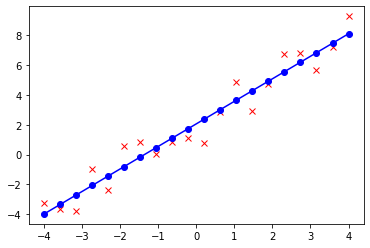

In [20]:
output = model(X)
plt.figure()
plt.plot(X, y, 'rx', X, output, 'b-o')
plt.show()

#  Multi-Layer Neural Networks

##  Dataset

In [24]:
X = np.linspace(-4, 4, 20)[..., np.newaxis]
y = np.sin(X * np.pi / 8)
print(X.shape, y.shape)

(20, 1) (20, 1)


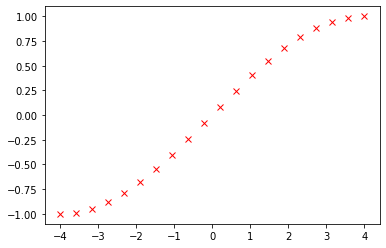

In [25]:
show(X, y)

##  Model

In [34]:
model = Sequential([Dense(5, activation='tanh', input_shape=(1,)),
                    Dense(1)])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 5)                 10        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 6         
Total params: 16
Trainable params: 16
Non-trainable params: 0
_________________________________________________________________


In [35]:
model.compile(loss='mse', optimizer='adam')

In [40]:
model.fit(X, y, batch_size=4, epochs=100)

Epoch 1/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0461
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0455
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0448
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0441
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0434
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0428
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0422
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0416
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0409
Epoch 10/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0403
Epoch 11/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0397
Epoch 12/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0390
Epoch 13/100
5/5 [==============================] - 0s 3ms/st

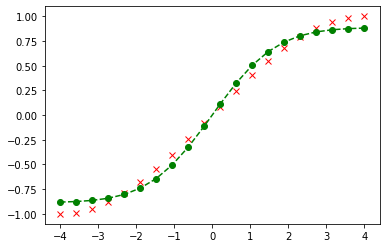

In [41]:
output = model.predict(X)
plt.figure()
plt.plot(X, y, 'rx', X, output, 'g--o')
plt.show()

#  Convolutional Neural Networks
#  Covid-19 Detection Using Chest X-Ray Images (CXR)

In [47]:
from google.colab import drive
from keras.layers import Conv2D, MaxPool2D, Flatten
from PIL import Image, ImageOps
import os
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


##  Dataset

In [43]:
!cp /content/gdrive/My\ Drive/covid/kaggle.json kaggle.json
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json
#!kaggle datasets list
!kaggle datasets download -d tawsifurrahman/covid19-radiography-database

 98% 729M/745M [00:22<00:00, 26.5MB/s]
100% 745M/745M [00:22<00:00, 34.7MB/s]


In [45]:
!unzip -q covid19-radiography-database.zip -d covid

In [48]:
covid_path = os.path.join('covid', 'COVID-19_Radiography_Dataset', 'COVID')
normal_path = os.path.join('covid', 'COVID-19_Radiography_Dataset', 'Normal')
covid_files = [os.path.join('covid', 'COVID-19_Radiography_Dataset', 'COVID', file) for file in os.listdir(covid_path)]
normal_files = [os.path.join('covid', 'COVID-19_Radiography_Dataset', 'Normal', file) for file in os.listdir(normal_path)]

In [53]:
m = min(len(covid_files), len(normal_files))
print(f'We want {m} samples in each class!')

We want 3616 samples in each class!


In [57]:
covid_images = np.array([np.array(ImageOps.grayscale(Image.open(file).resize((224,224))))[..., np.newaxis]/255. for file in covid_files[:m]])
normal_images = np.array([np.array(ImageOps.grayscale(Image.open(file).resize((224,224))))[..., np.newaxis]/255. for file in normal_files[:m]])

In [62]:
covid_targets = np.ones((len(covid_images,)))
normal_targets = np.zeros((len(normal_images,)))

In [63]:
N = 3000
covid_train, covid_test = covid_images[:N], covid_images[N:]
normal_train, normal_test = normal_images[:N], normal_images[N:]
Xtrain, Xtest = np.concatenate((covid_train, normal_train)), np.concatenate((covid_test, normal_test))

covid_train_target, covid_test_target = covid_targets[:N], covid_targets[N:]
normal_train_target, normal_test_target = normal_targets[:N], normal_targets[N:]
ytrain, ytest = np.concatenate((covid_train_target, normal_train_target)), np.concatenate((covid_test_target, normal_test_target))

In [64]:
print(Xtrain.shape, Xtest.shape)
print(ytrain.shape, ytest.shape)

(6000, 224, 224, 1) (1232, 224, 224, 1)
(6000,) (1232,)


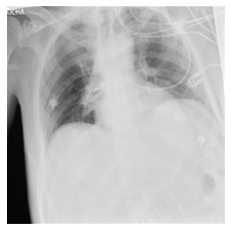

In [65]:
plt.figure()
plt.imshow(covid_images[0][:, :, 0], cmap='gray')
plt.axis('off')
plt.show()

##  Model

In [66]:
model = Sequential()
model.add(Conv2D(32, 3, 1, padding='same', activation='tanh', input_shape=(224,224,1)))
model.add(MaxPool2D())
model.add(Conv2D(64, 3, 1, padding='same', activation='tanh'))
model.add(MaxPool2D())
model.add(Conv2D(128, 3, 1, padding='same', activation='tanh'))
model.add(MaxPool2D())
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 100352)           

In [69]:
model.compile(loss='bce', optimizer='adam', metrics=['acc'])

In [71]:
model.fit(Xtrain, ytrain, batch_size=32, epochs=5, validation_data=(Xtest, ytest))

Epoch 1/5
188/188 [==============================] - 20s 104ms/step - loss: 0.1074 - acc: 0.9612 - val_loss: 0.1598 - val_acc: 0.9489
Epoch 2/5
188/188 [==============================] - 19s 101ms/step - loss: 0.0839 - acc: 0.9705 - val_loss: 0.1667 - val_acc: 0.9448
Epoch 3/5
188/188 [==============================] - 19s 101ms/step - loss: 0.0715 - acc: 0.9735 - val_loss: 0.1866 - val_acc: 0.9383
Epoch 4/5
188/188 [==============================] - 19s 100ms/step - loss: 0.0365 - acc: 0.9887 - val_loss: 0.2104 - val_acc: 0.9310
Epoch 5/5
188/188 [==============================] - 19s 101ms/step - loss: 0.0313 - acc: 0.9905 - val_loss: 0.1770 - val_acc: 0.9562
